# Exoplanet Data Analysis Practice

This notebook is for practicing data analysis with a moderately sized dataset with many attributes.


## Imports
The imports utilized for the data analysis

In [36]:
from matplotlib import pyplot as plt
from os import makedirs, path
from pandas import DataFrame, read_csv, concat
from typing import Union
from random import choice

## Importing the Dataset

Defines the path to the file of the dataset.

In [37]:
exoplanet_data: str = 'exoplanet_dataset/PS_2024.01.30_14.51.36.csv'

## Generating Key Map of Attributes

Creating a function to create a key map of the exoplanet attributes.

In [38]:
def generate_attribute_map(data_file: str, numeric: bool=False, category: str=None) -> dict[str, str]:
    """
    Generate an attribute map based on the provided data file, numeric flag, and category.

    Args:
        data_file (str): The path to the data file.
        numeric (bool, optional): Flag indicating whether to include only numeric attributes. Defaults to False.
        category (str, optional): The category of attributes to include. Can be 'planet', 'stellar', or None. Defaults to None.

    Returns:
        dict[str, str]: A dictionary mapping attribute names to their corresponding data.

    Raises:
        ValueError: If an invalid category is provided.
    """
    
    map: dict[str, str] = {}

    with open(data_file, 'r') as f:
        lines: list[str] = f.readlines()

    lines = lines[3:]
    if category == None:
        category_key = ''
    elif category == 'planet':
        category_key = 'pl_'
    elif category == 'stellar':
        category_key = 'st_'
    else:
        raise ValueError('Invalid category argument. Must be \"planet\", \"stellar\", or None.')

    while lines[0].startswith('# COLUMN'):
        line: str = lines.pop(0)[9:]
        if category_key in line and (not numeric or ('[' in line and ']' in line)):
            key, data = line.split(': ')
            map[key] = data.strip()

    return map
    

Creating the attribute map using the generate_attribute_map() function.

In [39]:
attribute_map: dict[str, str] = generate_attribute_map(exoplanet_data)
numeric_attribute_map: dict[str, str] = generate_attribute_map(exoplanet_data, numeric=True)
pl_attribute_map: dict[str, str] = generate_attribute_map(exoplanet_data, numeric=True, category='planet')
st_attribute_map: dict[str, str] = generate_attribute_map(exoplanet_data, numeric=True, category='stellar')

## Functions for Descriptive Statistics

Functions that show measures of central tendency, spread, and to make a scatter plot.

In [40]:
def get_central_tendencies(data_frame: DataFrame, column_name: str, type: str=None) -> Union[float, dict[str, float]]:
    """
    Calculate the central tendencies of a given column in a DataFrame.

    Parameters:
    - data_frame (DataFrame): The DataFrame containing the data.
    - column_name (str): The name of the column to calculate the central tendencies for.
    - type (str, optional): The type of central tendency to calculate. Valid options are 'mean', 'median', 'mode', or None (default).

    Returns:
    - If type is None, returns a dictionary containing the mean, median, and mode of the column.
    - If type is 'mean', returns the mean of the column.
    - If type is 'median', returns the median of the column.
    - If type is 'mode', returns the mode of the column.

    Raises:
    - ValueError: If an invalid type argument is provided.

    """
    if type == None:
        return {'mean': data_frame[column_name].mean(),
                'median': data_frame[column_name].median(),
                'mode': data_frame[column_name].mode()}
    if type == 'mean':
        return data_frame[column_name].mean()
    if type == 'median':
        return data_frame[column_name].median()
    if type == 'mode':
        return data_frame[column_name].mode()
    raise ValueError('Invalid type argument. Must be None, "mean", "median", or "mode".')

def get_spread(data_frame: DataFrame, column_name: str, type: str=None) -> Union[float, dict[str, float]]:
    """
    Calculate the spread measures of a given column in a DataFrame.

    Parameters:
    - data_frame (DataFrame): The DataFrame containing the data.
    - column_name (str): The name of the column to calculate the spread measures for.
    - type (str, optional): The type of spread measure to calculate. Valid options are 'variance',
      'standard_deviation', 'inter_quartile_range', 'range'. If not provided, a dictionary containing
      all the spread measures will be returned. Default is None.

    Returns:
    - If type is None, a dictionary containing the variance, standard deviation, inter-quartile range,
      and range of the column.
    - If type is 'variance', the variance of the column.
    - If type is 'standard_deviation', the standard deviation of the column.
    - If type is 'inter_quartile_range', the inter-quartile range of the column.
    - If type is 'range', the range of the column.

    Raises:
    - ValueError: If an invalid type argument is provided.

    """
    if type == None:
        return {'variance': data_frame[column_name].var(),
                'standard_deviation': data_frame[column_name].std(),
                'inter_quartile_range': data_frame[column_name].quantile(0.75) - data_frame[column_name].quantile(0.25),
                'range': data_frame[column_name].max() - data_frame[column_name].min()}
    if type == 'variance':
        return data_frame[column_name].var()
    if type == 'standard_deviation':
        return data_frame[column_name].std()
    if type == 'inter_quartile_range':
        return data_frame[column_name].quantile(0.75) - data_frame[column_name].quantile(0.25)
    if type == 'range':
        return data_frame[column_name].max() - data_frame[column_name].min()
    raise ValueError('Invalid type argument. Must be None, "variance", "standard_deviation", "inter_quartile_range", or "range".')
            

def generate_scatter_plot(data_frame: DataFrame, attribute_x: str, attribute_y: str, quantile_padding: float=0, create_image: float=False) -> None:
    """
    Generate a scatter plot based on the given DataFrame and attributes.

    Args:
        data_frame (DataFrame): The DataFrame containing the data.
        attribute_x (str): The attribute to be plotted on the x-axis.
        attribute_y (str): The attribute to be plotted on the y-axis.
        quantile_padding (float, optional): The padding for calculating the IQR. Defaults to 0.
        create_image (float, optional): Whether to save the plot as an image. Defaults to False.

    Returns:
        None
    """
    
    IQR_x: float = data_frame[attribute_x].quantile(1 - quantile_padding) - data_frame[attribute_x].quantile(quantile_padding)
    lower_bound_x: float = data_frame[attribute_x].quantile(quantile_padding) - 1.5 * IQR_x
    upper_bound_x: float = data_frame[attribute_x].quantile(1 - quantile_padding) + 1.5 * IQR_x

    IQR_y: float = data_frame[attribute_y].quantile(1 - quantile_padding) - data_frame[attribute_y].quantile(quantile_padding)
    lower_bound_y: float = data_frame[attribute_y].quantile(quantile_padding) - 1.5 * IQR_y
    upper_bound_y: float = data_frame[attribute_y].quantile(1 - quantile_padding) + 1.5 * IQR_y

    data_frame = data_frame[(data_frame[attribute_x] >= lower_bound_x) & (data_frame[attribute_x] <= upper_bound_x)]
    data_frame = data_frame[(data_frame[attribute_y] >= lower_bound_y) & (data_frame[attribute_y] <= upper_bound_y)]
    
    title: str = f'{attribute_map[attribute_x]} vs. {attribute_map[attribute_y]}'
    data_frame.plot(kind='scatter', x=attribute_x, y=attribute_y, title=title, color='red')
    plt.xlabel(attribute_map[attribute_x])
    plt.ylabel(attribute_map[attribute_y])
    if not create_image:
        plt.show()
    else:
        directory: str = 'exoplanet_scatter_plots'
        if not path.exists(directory):
            makedirs(directory)
        file_name: str = f'{attribute_x}_vs_{attribute_y}.png'
        file_path: str = path.join(directory, file_name)
        plt.savefig(file_path)

## Creating the Dataframe of the Exoplanets

In [41]:
pl_skip_row: list[int] = [0 + i for i in range(0, 290)]

pl_df: DataFrame = read_csv(exoplanet_data, skiprows = pl_skip_row, low_memory = False)

pl_df

,rowid,pl_name,hostname,pl_letter,hd_name,hip_name,tic_id,gaia_id,default_flag,sy_snum,...,sy_kepmagerr2,rowupdate,pl_pubdate,releasedate,pl_nnotes,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec
0,1,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,0,2,...,NaN,2014-07-23,2011-08,2014-07-23,2,1,2,0,0,0
1,2,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,0,2,...,NaN,2014-05-14,2008-01,2014-05-14,2,1,2,0,0,0
2,3,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,1,2,...,NaN,2023-09-19,2023-08,2023-09-19,2,1,2,0,0,0
3,4,11 UMi b,11 UMi,b,HD 136726,HIP 74793,TIC 230061010,Gaia DR2 1696798367260229376,1,1,...,NaN,2018-09-04,2017-03,2018-09-06,0,1,1,0,0,0
4,5,11 UMi b,11 UMi,b,HD 136726,HIP 74793,TIC 230061010,Gaia DR2 1696798367260229376,0,1,...,NaN,2018-04-25,2011-08,2014-07-23,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35195,35196,ups And d,ups And,d,HD 9826,HIP 7513,TIC 189576919,Gaia DR2 348020448377061376,0,2,...,NaN,2014-08-21,2004-01,2014-08-21,5,1,10,1,0,0
35196,35197,ups Leo b,ups Leo,b,NaN,NaN,TIC 49430557,Gaia DR2 3794167001116433152,1,1,...,NaN,2022-01-10,2021-12,2022-01-10,0,0,0,0,0,0
35197,35198,xi Aql b,xi Aql,b,HD 188310,HIP 97938,TIC 375464367,Gaia DR2 4298361114750843904,0,1,...,NaN,2014-07-23,2011-08,2014-07-23,1,1,1,0,0,0
35198,35199,xi Aql b,xi Aql,b,HD 188310,HIP 97938,TIC 375464367,Gaia DR2 4298361114750843904,0,1,...,NaN,2014-05-14,2008-06,2014-05-14,1,1,1,0,0,0


In [42]:
pl_df_numeric: DataFrame = pl_df.select_dtypes(include=['float64', 'int64'])
identifier_columns: DataFrame = pl_df[['rowid', 'pl_name', 'hostname', 'pl_letter']]

pl_df_numeric = pl_df_numeric.drop(['rowid'], axis=1)
pl_df_numeric = concat([identifier_columns, pl_df_numeric], axis = 1)

pl_df_numeric

,rowid,pl_name,hostname,pl_letter,default_flag,sy_snum,sy_pnum,sy_mnum,cb_flag,disc_year,...,sy_tmagerr2,sy_kepmag,sy_kepmagerr1,sy_kepmagerr2,pl_nnotes,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec
0,1,11 Com b,11 Com,b,0,2,1,0,0,2007,...,-0.0071,NaN,NaN,NaN,2,1,2,0,0,0
1,2,11 Com b,11 Com,b,0,2,1,0,0,2007,...,-0.0071,NaN,NaN,NaN,2,1,2,0,0,0
2,3,11 Com b,11 Com,b,1,2,1,0,0,2007,...,-0.0071,NaN,NaN,NaN,2,1,2,0,0,0
3,4,11 UMi b,11 UMi,b,1,1,1,0,0,2009,...,-0.0075,NaN,NaN,NaN,0,1,1,0,0,0
4,5,11 UMi b,11 UMi,b,0,1,1,0,0,2009,...,-0.0075,NaN,NaN,NaN,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35195,35196,ups And d,ups And,d,0,2,3,0,0,1999,...,-2.1920,NaN,NaN,NaN,5,1,10,1,0,0
35196,35197,ups Leo b,ups Leo,b,1,1,1,0,0,2021,...,-2.0505,NaN,NaN,NaN,0,0,0,0,0,0
35197,35198,xi Aql b,xi Aql,b,0,1,1,0,0,2007,...,-0.0072,NaN,NaN,NaN,1,1,1,0,0,0
35198,35199,xi Aql b,xi Aql,b,0,1,1,0,0,2007,...,-0.0072,NaN,NaN,NaN,1,1,1,0,0,0


In [43]:
pl_rade_central_tendencies_map: dict[str, float] = get_central_tendencies(pl_df, 'pl_rade')
print(f'Average of {attribute_map['pl_rade']}: {pl_rade_central_tendencies_map['mean']:.4f}')

pl_radj_central_tendencies_map: dict[str, float] = get_central_tendencies(pl_df, 'pl_radj')
print(f'Average of {attribute_map['pl_radj']}: {pl_radj_central_tendencies_map['mean']:.4f}')

st_logg_median: float = get_central_tendencies(pl_df, 'st_logg', type='median')
print(f'Median of {attribute_map['st_logg']}: {st_logg_median:.4f}')


Average of Planet Radius [Earth Radius]: 5.3068
Average of Planet Radius [Jupiter Radius]: 0.4362
Median of Stellar Surface Gravity [log10(cm/s**2)]: 4.4700


<h1>Plot</h1>

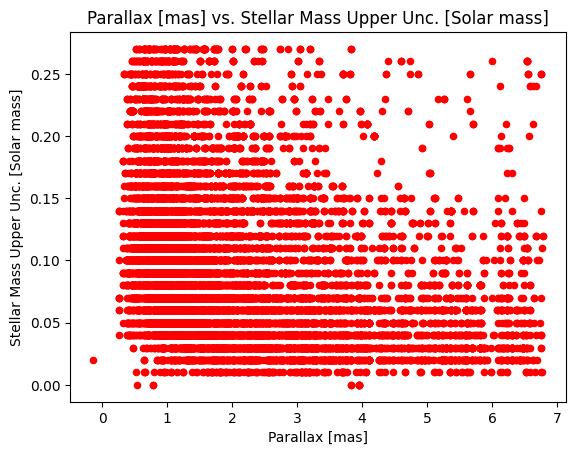

In [53]:
numeric_attributes: list[str] = list(numeric_attribute_map.keys())

attribute_x: str = choice(numeric_attributes)
attribute_y: str = choice(numeric_attributes)

generate_scatter_plot(pl_df, attribute_x, attribute_y, quantile_padding=0.25, create_image=True)